In [1]:
import numpy as np
import pandas as pd
import string
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_json('/content/drive/My Drive/Project/Smart Career/dataengineer.json',lines=True)
df.head()

,_id,ProfileID,Job Title,Location,Profile Summary,Experience,Education,Skills & Endorsements,Industry Knowledge,Tools & Technologies,Other Skills,Date Captured,Interpersonal Skills,Languages
0,{'$oid': '5dca1376f68f858820733c99'},jilliankim,Senior Data Engineer at Change Healthcare,San Francisco Bay Area,As a software engineer at an research and deve...,"[{'Job Title': 'Senior Data Engineer', 'Compan...","[{'School': 'University of Washington', 'Degre...","[{'Skills': 'Apache Spark'}, {'Skills': 'Apach...","[{'Skills': 'Research'}, {'Skills': 'Data Anal...","[{'Skills': 'Java'}, {'Skills': 'HBase'}, {'Sk...","[{'Skills': 'Apache Pig'}, {'Skills': 'Apache ...",2019-11-12,NaN,NaN
1,{'$oid': '5dca1380f68f858820733c9b'},hyunsikchoi,Sr. Principal Data Engineer at Coupang Global ...,San Francisco Bay Area,Specialties: * Query evaluation techniques in ...,"[{'Job Title': 'Director of Research', 'Compan...","[{'School': 'Korea University', 'Degree': 'Doc...","[{'Skills': 'Hadoop'}, {'Skills': 'Distributed...","[{'Skills': 'Algorithms'}, {'Skills': 'Big Dat...","[{'Skills': 'Open Source'}, {'Skills': 'Java'}...","[{'Skills': 'Data Processing'}, {'Skills': 'La...",2019-11-12,NaN,NaN
2,{'$oid': '5dca13b2f68f858820733c9d'},rui-deng-b7b37714a,Data Engineer at PlayStation,"Los Angeles, California",,"[{'Job Title': 'Data Engineer', 'Company': 'Pl...","[{'School': 'University of Virginia', 'Degree'...","[{'Skills': 'Python (Programming Language)'}, ...",NaN,NaN,NaN,2019-11-12,NaN,NaN
3,{'$oid': '5dca13bff68f858820733c9f'},seungjoonlee1984,Architect / Data engineer,"Berkeley, California","Energetic and motivating, those are the two wo...",[{'Job Title': 'Senior Site Reliability Engine...,"[{'School': 'University of California, Berkele...","[{'Skills': 'JavaScript'}, {'Skills': 'Python'...","[{'Skills': 'Web Applications'}, {'Skills': 'W...","[{'Skills': 'Java'}, {'Skills': 'JSON'}, {'Ski...","[{'Skills': 'Memcached'}, {'Skills': 'Google A...",2019-11-12,NaN,NaN
4,{'$oid': '5dca13caf68f858820733ca1'},taeho-jeon-78418870,Data Scientist and ML Engineer,Greater Seattle Area,Machine learning engineer and data scientist w...,"[{'Job Title': 'Data Scientist Student', 'Comp...","[{'School': 'Flatiron School', 'Degree': ' Dat...","[{'Skills': 'iOS development'}, {'Skills': 'Ja...","[{'Skills': 'Web Development'}, {'Skills': 'An...","[{'Skills': 'swift'}, {'Skills': 'Objective-C'...","[{'Skills': '����Ͼ�'}, {'Skills': 'C++ Languag...",2019-11-12,[{'Skills': 'Written Communication'}],NaN


In [0]:
df = df.reset_index()

## Skill

In [0]:
## 복잡한 형태의 column을 일정한 형태로 맞춰주기위함
def prep_edu(ro):
    if ro ==[]:
        ro = [{'School':'No School','Degree':'No Degree','Date Attend':'No attend'}]
    else:
        ro=ro
    return ro

def prep_exp(ro):
    if ro==[]:
        ro = [{'Job Title':'','Company':'','Period':'','Years':'','Location':'','Description':''}]
    else:
        ro = ro
    return ro

def prep_sk(ro):
    if ro==[]:
        ro=[{'Skills':''}]
    else:
        ro=ro
    return ro
    

In [0]:
## 바로 apply를 하면 nan은 float type이라서 len가 안먹힌다.
## 각 column을 공통 type으로 맞춰주기 위해 nan값을 찾아 빈리스트로 대체
def nan_to_list(num):
    if num!=num:
        return list()
    else:
        return num

for i in df:
    df[i] = df[i].apply(lambda x: nan_to_list(x))

In [0]:
df['Skills & Endorsements'] = df['Skills & Endorsements'].apply(lambda x:prep_sk(x))
df['Tools & Technologies'] = df['Tools & Technologies'].apply(lambda x:prep_sk(x))
df['Interpersonal Skills']=df['Interpersonal Skills'].apply(lambda x:prep_sk(x))
df['Other Skills'] = df['Other Skills'].apply(lambda x:prep_sk(x))
df['Industry Knowledge'] = df['Industry Knowledge'].apply(lambda x:prep_sk(x))
df['Experience'] = df['Experience'].apply(lambda x:prep_exp(x))
df['Education'] = df['Education'].apply(lambda x:prep_edu(x))

In [0]:
## nlp에 필요한 function정의
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [0]:
## skill들을 빼올수 있는 함수 생성
def get_skill(sel):
    skill_list = []
    for i in range(len(sel)):
        skill_list.append(sel[i]['Skills'])
    return skill_list

In [0]:
## 각 skill column에서 모든 skill들 list를 구하는 함수
def get_skill_list(ser):
    ret = []
    for idx in range(len(ser)):
        for i,v in enumerate(ser.iloc[idx]):
            ret.append(v)
    return ret

In [11]:
for col in ['Skills & Endorsements','Tools & Technologies','Interpersonal Skills','Other Skills','Industry Knowledge']:
    df[col] = df[col].apply(lambda x:get_skill(x))

df.head()

,index,_id,ProfileID,Job Title,Location,Profile Summary,Experience,Education,Skills & Endorsements,Industry Knowledge,Tools & Technologies,Other Skills,Date Captured,Interpersonal Skills,Languages
0,0,{'$oid': '5dca1376f68f858820733c99'},jilliankim,Senior Data Engineer at Change Healthcare,San Francisco Bay Area,As a software engineer at an research and deve...,"[{'Job Title': 'Senior Data Engineer', 'Compan...","[{'School': 'University of Washington', 'Degre...","[Apache Spark, Apache Hadoop, Scala]","[Research, Data Analysis, Web Development, Tes...","[Java, HBase, C, C++, CSS, JavaScript, Matlab,...","[Apache Pig, Apache Hive, Cassandra, Hive, Apa...",2019-11-12,[],[]
1,1,{'$oid': '5dca1380f68f858820733c9b'},hyunsikchoi,Sr. Principal Data Engineer at Coupang Global ...,San Francisco Bay Area,Specialties: * Query evaluation techniques in ...,"[{'Job Title': 'Director of Research', 'Compan...","[{'School': 'Korea University', 'Degree': 'Doc...","[Hadoop, Distributed Systems, MapReduce]","[Algorithms, Big Data, Software Development, C...","[Open Source, Java, Linux, C++, REST, Rust, SQL]","[Data Processing, Large Scale Systems, ANTLR, ...",2019-11-12,[],[]
2,2,{'$oid': '5dca13b2f68f858820733c9d'},rui-deng-b7b37714a,Data Engineer at PlayStation,"Los Angeles, California",,"[{'Job Title': 'Data Engineer', 'Company': 'Pl...","[{'School': 'University of Virginia', 'Degree'...","[Python (Programming Language), PL/SQL, Apache...",[],[],[],2019-11-12,[],[]
3,3,{'$oid': '5dca13bff68f858820733c9f'},seungjoonlee1984,Architect / Data engineer,"Berkeley, California","Energetic and motivating, those are the two wo...",[{'Job Title': 'Senior Site Reliability Engine...,"[{'School': 'University of California, Berkele...","[JavaScript, Python, REST]","[Web Applications, Web Development, Agile Meth...","[Java, JSON, jQuery, CSS, PHP, Hadoop, MongoDB...","[Memcached, Google API, Amazon EC2, DOM, Smart...",2019-11-12,[],[]
4,4,{'$oid': '5dca13caf68f858820733ca1'},taeho-jeon-78418870,Data Scientist and ML Engineer,Greater Seattle Area,Machine learning engineer and data scientist w...,"[{'Job Title': 'Data Scientist Student', 'Comp...","[{'School': 'Flatiron School', 'Degree': ' Dat...","[iOS development, Java Application Development...","[Web Development, Android Development, Digital...","[swift, Objective-C, Angular, JAVA, SQL, iOS, ...","[����Ͼ�, C++ Language, ������ ������, ������ �...",2019-11-12,[Written Communication],[]


In [0]:
skill_list1 = get_skill_list(df['Skills & Endorsements'])
skill_list2 = get_skill_list(df['Tools & Technologies'])
skill_list3 = get_skill_list(df['Interpersonal Skills'])
skill_list4 = get_skill_list(df['Other Skills'])
skill_list5 = get_skill_list(df['Industry Knowledge'])

In [0]:
skill_list1

In [0]:
sk_li1 = [];sk_li2 = [];sk_li3 = [];sk_li4 = [];sk_li5 = []

for i in range(len(skill_list1)):
    if skill_list1[i]!='':
        sk_li1.append(skill_list1[i])
for i in range(len(skill_list2)):
    if skill_list2[i]!='':
        sk_li2.append(skill_list2[i])
for i in range(len(skill_list3)):
    if skill_list3[i]!='':
        sk_li3.append(skill_list3[i])
for i in range(len(skill_list4)):
    if skill_list4[i]!='':
        sk_li4.append(skill_list4[i])
for i in range(len(skill_list5)):
    if skill_list5[i]!='':
        sk_li5.append(skill_list5[i])    




In [0]:
col1 = pd.Series(sk_li1).value_counts().iloc[:10].index.tolist()
col2 = pd.Series(sk_li2).value_counts().iloc[:10].index.tolist()
col3 = pd.Series(sk_li3).value_counts().iloc[:10].index.tolist()
col4 = pd.Series(sk_li4).value_counts().iloc[:10].index.tolist()
col5 = pd.Series(sk_li5).value_counts().iloc[:10].index.tolist()

In [0]:
col_new = col1.copy()

In [0]:
col_new.extend(col5)

In [0]:
col_new = list(set(col_new))

In [0]:
col_new

['Marketing Strategy',
 'Hospitality',
 'Data Analysis',
 'PowerPoint',
 'Microsoft Word',
 'Microsoft Excel',
 'Data Analytics',
 'Social Media',
 'Time Management',
 'Management',
 'Leadership',
 'Team Building',
 'Python',
 'Sales',
 'Research',
 'Process Improvement',
 'Networking',
 'Event Planning',
 'Customer Service',
 'Tableau',
 'Communication',
 'Social Media Marketing',
 'R',
 'Korean',
 'Public Speaking',
 'Microsoft PowerPoint',
 'Google Analytics',
 'Team Leadership',
 'SQL',
 'Marketing Analytics',
 'Market Research',
 'Microsoft Office',
 'Marketing Research',
 'Hotels',
 'Data Science',
 'Project Management',
 'Marketing',
 'Social Networking',
 'Fundraising',
 'Teamwork']

In [0]:
for col in col_new:
    df_sk[col] = 'None'

In [0]:
col_sk

['Skills & Endorsements',
 'Tools & Technologies',
 'Other Skills',
 'Interpersonal Skills',
 'Industry Knowledge']

In [0]:
for idx in range(len(df_sk)):
    for se in col_new:
        for col in col_sk:
            for i in range(len(df_sk.iloc[idx][col])):
                if df_sk.iloc[idx][col][i]==se:
                    df_sk[se].iloc[idx]=1

In [0]:
for idx in range(len(df_sk)):
    for col in col_new:
        if df_sk[col].iloc[idx]=='None':
            df_sk[col].iloc[idx]=0

In [0]:
df.columns
df_new = df[['Job Title','ID','Years','School','Degree','State','City','Major']]

In [0]:
for col in col_new:
    df_new[col] = df_sk[col]

In [0]:
df_new

,Job Title,ID,Years,School,Degree,State,City,Major,Marketing Strategy,Hospitality,Data Analysis,PowerPoint,Microsoft Word,Microsoft Excel,Data Analytics,Social Media,Time Management,Management,Leadership,Team Building,Python,Sales,Research,Process Improvement,Networking,Event Planning,Customer Service,Tableau,Communication,Social Media Marketing,R,Korean,Public Speaking,Microsoft PowerPoint,Google Analytics,Team Leadership,SQL,Marketing Analytics,Market Research,Microsoft Office,Marketing Research,Hotels,Data Science,Project Management,Marketing,Social Networking,Fundraising,Teamwork
0,Data Analyst,0,4,"University of California, Irvine Division of C...",ETC,California,None,Certificate of Data Analytics Management Infor...,1,0,1,1,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
1,Analyst at Gerson Lehrman Group,1,3,University of Surrey,Bachelor,None,None,Bachelor of Science - BS Field Of Study,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Regional Analyst, Google",2,9,"University of California, Los Angeles",ETC,New York,New York,East Asian Studies,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Strategy Analyst at Accenture,3,8,"University of California, Berkeley",Not Specification,California,None,,0,0,1,1,1,1,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Data Analyst at Microsoft,4,3,University of Pittsburgh College of Business A...,Bachelor,Pennsylvania,Pittsburgh,Bachelor of Business Administration - BBA Mark...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,Talent Analyst at Vaco,1885,0,No School,Not Specification,California,None,No Degree,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1886,Data Science at Caesars Entertainment Corporation,1886,0,No School,Not Specification,Nevada,Las Vegas,No Degree,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1887,Marketing Manager at The Mansion at Glen Cove,1887,6,The Johns Hopkins University - Carey Business ...,Master,New York,New York,Master of Business Administration - MBA Manage...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1888,Direct Marketing Manager at Best Western® Hote...,1888,0,No School,Not Specification,Arizona,None,No Degree,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_new.to_csv('analyst_ver2.csv')

In [0]:
df_sk.columns

Index(['ID', 'Years', 'Skills & Endorsements', 'Tools & Technologies',
       'Other Skills', 'Industry Knowledge', 'Interpersonal Skills',
       'Marketing Strategy', 'Hospitality', 'Data Analysis', 'PowerPoint',
       'Microsoft Word', 'Microsoft Excel', 'Data Analytics', 'Social Media',
       'Time Management', 'Management', 'Leadership', 'Team Building',
       'Python', 'Sales', 'Research', 'Process Improvement', 'Networking',
       'Event Planning', 'Customer Service', 'Tableau', 'Communication',
       'Social Media Marketing', 'R', 'Korean', 'Public Speaking',
       'Microsoft PowerPoint', 'Google Analytics', 'Team Leadership', 'SQL',
       'Marketing Analytics', 'Market Research', 'Microsoft Office',
       'Marketing Research', 'Hotels', 'Data Science', 'Project Management',
       'Marketing', 'Social Networking', 'Fundraising', 'Teamwork'],
      dtype='object')

In [0]:
for col in col_sk:
    print(df_sk.iloc[0][col]=='SQL')

False
False
False
False
False


In [0]:
pd.Series(sk_li1).value_counts().iloc[:10]

Microsoft Office    280
Microsoft Excel     251
Leadership          191
Data Analysis       145
Public Speaking     125
Customer Service    107
Marketing            89
Social Media         84
SQL                  83
R                    80
dtype: int64

In [0]:
pd.Series(sk_li2).value_counts().iloc[:10]

Microsoft Excel         528
Microsoft Office        472
Microsoft Word          450
PowerPoint              377
Microsoft PowerPoint    317
SQL                     192
Tableau                 163
R                       139
Python                  138
Google Analytics        107
dtype: int64

In [0]:
pd.Series(sk_li3).value_counts().iloc[:10]

Leadership          416
Public Speaking     365
Customer Service    343
Management          343
Teamwork            334
Time Management     200
Communication       119
Team Leadership     103
Fundraising          74
Team Building        69
dtype: int64

In [0]:
pd.Series(sk_li4).value_counts().iloc[:10]

Social Networking      159
Hospitality             39
Networking              35
Data Analytics          34
Hotels                  26
Marketing Research      25
Marketing Analytics     21
Korean                  21
Process Improvement     20
Data Science            17
dtype: int64

In [0]:
pd.Series(sk_li5).value_counts().iloc[:10]

Social Media              385
Research                  385
Data Analysis             349
Marketing                 282
Event Planning            264
Project Management        242
Marketing Strategy        175
Social Media Marketing    174
Sales                     163
Market Research           159
dtype: int64

In [0]:
## skill별 Top 10
print(pd.Series(skill_list1).value_counts().iloc[:10])
print('\n',pd.Series(skill_list2).value_counts().iloc[:10])
print('\n',pd.Series(skill_list3).value_counts().iloc[:10])
print('\n',pd.Series(skill_list4).value_counts().iloc[:10])
print('\n',pd.Series(skill_list5).value_counts().iloc[:10])
## Issue Analyst의 경우 skills:'','',이런식으로 되어있는 경우가 있음

In [0]:
## 가지고 있는 스킬의 수를 구하는 함수
def get_cnt_skill(ro):
    return len(ro) 

In [0]:
df['endorsement cnt'] = df['Skills & Endorsements'].apply(lambda x:get_cnt_skill(x))
df['tool cnt']        = df['Tools & Technologies'].apply(lambda x:get_cnt_skill(x))
df['personal cnt']    = df['Interpersonal Skills'].apply(lambda x:get_cnt_skill(x))
df['etc cnt']         = df['Other Skills'].apply(lambda x:get_cnt_skill(x))
df['knowledge cnt']   = df['Industry Knowledge'].apply(lambda x:get_cnt_skill(x))

In [0]:
## skill명과 skill column을 받아 스킬수를 출력해보자
def have_skill(ski,ser):
    tf=0
    for idx in range(len(ser)):
        if ski in ser.iloc[idx]:
            tf+=1
    return tf

In [0]:
ski = input('조회할 스킬')
col = input('조회할 컬럼명')
print('{}를 갖고 있는 사람의 수는 {}'.format(ski,have_skill(ski,df[col])))

조회할 스킬Python
조회할 컬럼명Other Skills
Python를 갖고 있는 사람의 수는 0


In [0]:
## 스킬 컬럼을 선택했을때 갖고 있는 스킬의 분포를 확인하고 싶다.
def get_dist(col,tp_sel):
    plt.figure(figsize = (10,5))
    a=list()
    for idx in range(len(df[col])):
        for i,v in enumerate(df[col].iloc[idx]):
            a.append(v)
    return pd.Series(a).value_counts().iloc[:tp_sel].plot(kind='bar')
    #return df_skill[col].value_counts()

조회할 컬럼Other Skills
Top몇15


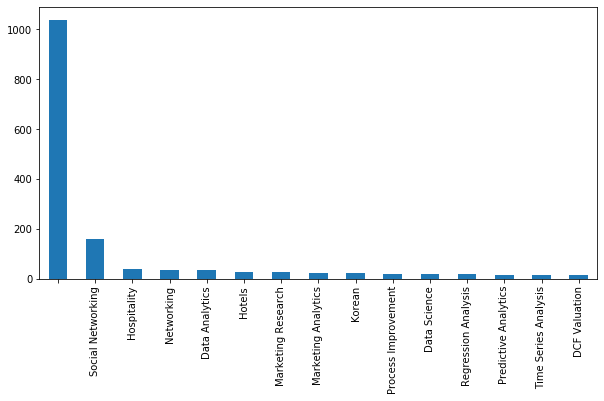

In [0]:
col=input('조회할 컬럼')
tp_sel = int(input('Top몇'))
get_dist(col,tp_sel)

## Year

In [0]:
def get_year(tr):
    mo_tr = 0
    ye_tr = 0
    year = 0
    for i in range(len(tr)):
        
        tr[i]['Years'] = tr[i]['Years'].replace(' ','').replace('yrs','yr').replace('mos','mo')
        if 'yr' in tr[i]['Years'] and 'mo' in tr[i]['Years']:
            ye_tr+=np.int(tr[i]['Years'].replace('mo','').split('yr')[0])
            mo_tr+=np.int(tr[i]['Years'].replace('mo','').split('yr')[1])
        elif 'yr' not in tr[i]['Years'] and 'mo' in tr[i]['Years']:
            mo_tr+=np.int(tr[i]['Years'].replace('mo',''))
            ye_tr+=0
        elif 'yr' in tr[i]['Years'] and 'mo' not in tr[i]['Years']:
            ye_tr+=np.int(tr[i]['Years'].replace('yr',''))
            mo_tr+=0
        else:
            ye_tr+=0
            mo_tr+= 0
    year = int(round(((ye_tr*12)+mo_tr)/12,0))
    return year

In [0]:
df['Years'] = df['Experience'].apply(lambda x:get_year(x))

In [0]:
def get_school(ser):
     
    if len(ser)==0:
        school = 'No School'
    else:
        school = ser[0]['School']
    return school

In [0]:
df['School'] = df['Education'].apply(lambda x:get_school(x))
df.head()

,index,,Date Captured,Education,Experience,Industry Knowledge,Interpersonal Skills,Job Title,Languages,Location,Other Skills,Profile Summary,ProfileID,Skills & Endorsements,Tools & Technologies,_id,endorsement cnt,tool cnt,personal cnt,etc cnt,knowledge cnt,Years,School
0,0,[],2019-11-09,"[{'School': 'University of California, Irvine ...","[{'Job Title': 'Data Analyst', 'Company': 'NEX...","[SEO, Business Development, Online Marketing, ...","[Management, Customer Service]",Data Analyst,[],"Emeryville, California","[Inbound Marketing, DoubleClick, Ad Networks, ...",Detail-oriented marketing data analyst with st...,emmabobaekong,"[Data Analysis, SQL, Tableau]","[Google Analytics, Python, Google Adwords, Goo...",{'$oid': '5dc67f352d165786280a5e89'},3,14,2,6,15,4,"University of California, Irvine Division of C..."
1,1,[],2019-11-09,"[{'School': 'University of Surrey', 'Degree': ...","[{'Job Title': 'Analyst', 'Company': 'GLG (Ger...",[customer relation management],"[Problem Solving, talent management]",Analyst at Gerson Lehrman Group,[],United States,"[리서치, 프로젝트 관리, MS 오피스, 고객서비스, 팀워크, 문제관리]",,jinwoo-kang-097b0977,"[market research, analyzing, recruiting]",[],{'$oid': '5dc67f512d165786280a5e8b'},3,1,2,6,1,3,University of Surrey
2,2,[],2019-11-09,"[{'School': 'University of California, Los Ang...","[{'Job Title': 'Company Name Google', 'Company...","[Project Management, Competitive Analysis]",[],"Regional Analyst, Google",[],Greater New York City Area,"[Marketing Research, Strategic Insights, Consu...",,suzannesoojungbae,"[Online Advertising, Digital Marketing, Digita...",[],{'$oid': '5dc67f692d165786280a5e8d'},3,1,1,4,2,9,"University of California, Los Angeles"
3,3,[],2019-11-09,"[{'School': 'University of California, Berkele...","[{'Job Title': 'Strategy Analyst', 'Company': ...","[Data Analysis, Event Planning, Social Media]","[Leadership, Customer Service, Management]",Strategy Analyst at Accenture,[],"Berkeley, California",[],,hayliekim,"[Microsoft Office, Public Speaking, Research]","[Microsoft Excel, Microsoft Word, Microsoft Po...",{'$oid': '5dc67f832d165786280a5e8f'},3,5,3,1,3,8,"University of California, Berkeley"
4,4,[],2019-11-09,[{'School': 'University of Pittsburgh College ...,"[{'Job Title': 'Company Name Responsival', 'Co...","[Digital Marketing, Public Relations, Social M...","[Leadership, Communication, Public Speaking]",Data Analyst at Microsoft,[{'Skills': 'Chinese'}],Greater Pittsburgh Area,[HootSuite],A passionate and eager individual who is alway...,angeline-peng,"[Project Management, Strategic Planning, Socia...","[Microsoft Office, YouTube, Java, HTML]",{'$oid': '5dc67f9e2d165786280a5e91'},3,4,3,1,3,3,University of Pittsburgh College of Business A...


## Degree

In [0]:
def get_degree(ser):
    if len(ser)==0:
        deg = 'Not Specification'
    else:
        deg = ser[0]['Degree']
    return deg

In [0]:
df['Degree'] = df['Education'].apply(lambda x:get_degree(x))
df.iloc[5,-1]

'Master of Fine Arts (MFA) Communication Design '

In [0]:
## 수작업을 위해 degree만 빼와서 작업해보자
df_deg = df[['Degree']]
df_deg['punct'] = df_deg['Degree'].apply(lambda x:remove_punct(x.replace(' ','').lower()))
#df_deg['tokn']  = df_deg['punct'].apply(lambda x:tokenize(x))
#df_deg['stp']   = df_deg['tokn'].apply(lambda x:remove_stopwords(x))
#df_deg['lemm']  = df_deg['stp'].apply(lambda x:lemmatizing(x))
df_deg['two'] = df_deg['punct'].apply(lambda x:x[:2])
df_deg.head()

,Degree,punct,two
0,Certificate of Data Analytics Management Infor...,certificateofdataanalyticsmanagementinformatio...,ce
1,Bachelor of Science - BS Field Of Study,bachelorofsciencebsfieldofstudy,ba
2,East Asian Studies,eastasianstudies,ea
3,,,
4,Bachelor of Business Administration - BBA Mark...,bachelorofbusinessadministrationbbamarketingdi...,ba


In [0]:
df_deg[df_deg['two']=='ec'][['Degree','two']]

,Degree,two
69,Economics Bachelor of Arts (B.A.),ec
75,Economics and Legal Studies double major,ec
85,Economics,ec
207,Economics,ec
218,Economics,ec
231,Economics and Business & Administrations,ec
248,Economics 3.88,ec
249,"Economics, Art History",ec
305,Ecomonics and Political Science Senior,ec
314,Economics,ec


In [0]:
## no는 degree입력 안한사람들
##   는 입력은 했는데 space로 입력했나봄


In [0]:
# kind_deg = df_deg['two'].value_counts()
# kind_deg 'ma' 'ba' 'no' 'do' 
def deg_class(tr):
    if len(tr)==0 or tr[0]=='n':
        ret = 'Not Specification'
    elif tr[0]=='b':
        ret = 'Bachelor'
    elif tr[0]=='m':
        ret = 'Master'
    elif tr[0]=='d' or tr=='ph':
        ret = 'Ph.D'
    else:
        ret = 'ETC'
    return ret

In [0]:
df['Degree'] = df_deg['two'].apply(lambda x:deg_class(x))

## Location

In [0]:
city_state = pd.read_csv('/content/drive/My Drive/Python/Project/Smart Career/city_state.csv')
city_state

,city,state,state_s,city_s
0,New York,New York,newyork,newyork
1,Los Angeles,California,california,losangeles
2,Chicago,Illinois,illinois,chicago
3,Houston,Texas,texas,houston
4,Phoenix,Arizona,arizona,phoenix
...,...,...,...,...
309,Edison,New Jersey,newjersey,edison
310,Woodbridge,New Jersey,newjersey,woodbridge
311,San Angelo,Texas,texas,sanangelo
312,Kenosha,Wisconsin,wisconsin,kenosha


In [0]:
df_loc = pd.DataFrame(df['Location'].str.replace(' ','').str.replace(',','').str.lower())

In [0]:
df['State'] = None
df['City'] = None

In [0]:
for i in range(len(df_loc)):
    for j in range(len(city_state)):
        if city_state['city_s'][j] in df_loc['Location'][i]:
            df['City'][i] = city_state['city'][j]
            df['State'][i] = city_state['state'][j]
            break
            
        elif city_state['state_s'][j] in df_loc['Location'][i]:
            df['State'][i] = city_state['state'][j]
            break


In [0]:
df.columns

Index(['index', '', 'Date Captured', 'Education', 'Experience',
       'Industry Knowledge', 'Interpersonal Skills', 'Job Title', 'Languages',
       'Location', 'Other Skills', 'Profile Summary', 'ProfileID',
       'Skills & Endorsements', 'Tools & Technologies', '_id',
       'endorsement cnt', 'tool cnt', 'personal cnt', 'etc cnt',
       'knowledge cnt', 'Years', 'School', 'Degree', 'State', 'City', 'Major',
       'ID'],
      dtype='object')

In [0]:
df_sk = df[['ID','Years','Skills & Endorsements','Tools & Technologies','Other Skills','Industry Knowledge','Interpersonal Skills']]


In [0]:
df_sk

,ID,Years,Skills & Endorsements,Tools & Technologies,Other Skills,Industry Knowledge,Interpersonal Skills
0,0,4,"[Data Analysis, SQL, Tableau]","[Google Analytics, Python, Google Adwords, Goo...","[Inbound Marketing, DoubleClick, Ad Networks, ...","[SEO, Business Development, Online Marketing, ...","[Management, Customer Service]"
1,1,3,"[market research, analyzing, recruiting]",[],"[리서치, 프로젝트 관리, MS 오피스, 고객서비스, 팀워크, 문제관리]",[customer relation management],"[Problem Solving, talent management]"
2,2,9,"[Online Advertising, Digital Marketing, Digita...",[],"[Marketing Research, Strategic Insights, Consu...","[Project Management, Competitive Analysis]",[]
3,3,8,"[Microsoft Office, Public Speaking, Research]","[Microsoft Excel, Microsoft Word, Microsoft Po...",[],"[Data Analysis, Event Planning, Social Media]","[Leadership, Customer Service, Management]"
4,4,3,"[Project Management, Strategic Planning, Socia...","[Microsoft Office, YouTube, Java, HTML]",[HootSuite],"[Digital Marketing, Public Relations, Social M...","[Leadership, Communication, Public Speaking]"
...,...,...,...,...,...,...,...
1885,1885,0,"[, , ]",[],[],[],[]
1886,1886,0,"[, , ]",[],[],[],[]
1887,1887,6,"[, , ]",[],[],[],[]
1888,1888,0,"[, , ]",[],[],[],[]
